In [4]:
from efficient_apriori import apriori
import pandas as pd
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import datetime


In [12]:
data = pd.read_csv('pangann.csv')
data.head()

,Komoditas,Tahun,Bulan,Harga
0,Beras Premium,2021,Januari,"Rp12,319"
1,Beras Medium,2021,Januari,"Rp10,865"
2,Kedelai Biji Kering,2021,Januari,"Rp10,607"
3,Bawang Merah,2021,Januari,"Rp30,329"
4,Bawang Putih (Bonggol),2021,Januari,"Rp26,308"


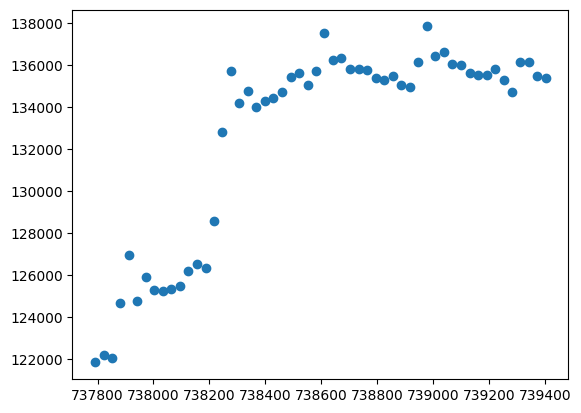

In [44]:
pangan = data[data['Komoditas'] == 'Daging Sapi Murni'].copy()
data['Harga_Clean'] = pd.to_numeric(
    data['Harga'].astype(str).str.replace('Rp', '').str.replace(',', ''),
    errors='coerce'
)

data['Komoditas'] = data['Komoditas'].str.strip()

map_bulan = {
    'Januari': 1, 'Februari': 2, 'Maret': 3, 'April': 4, 'Mei': 5, 'Juni': 6,
    'Juli': 7, 'Agustus': 8, 'September': 9, 'Oktober': 10, 'November': 11, 'Desember': 12
}
pangan['Bulan_Angka'] = pangan['Bulan'].map(map_bulan)

pangan['Tanggal'] = pd.to_datetime(dict(year=pangan['Tahun'], month=pangan['Bulan_Angka'], day=1))

pangan['X_Time'] = pangan['Tanggal'].apply(lambda d: d.toordinal())


x = pangan['X_Time'].values
y = pangan['Harga_Clean'].values

plt.scatter(x, y)

In [41]:
koef, konst, r, p, std_err = stats.linregress(x, y)
print(f"Kemiringan (Slope): {koef:.2f}")
print(f"Konstanta (Intercept): {konst:.2f}")
print(f"Akurasi (R-squared): {r**2:.4f}")

Kemiringan (Slope): 8.23
Konstanta (Intercept): -5947499.22
Akurasi (R-squared): 0.6626


In [42]:
import datetime
target_dates = [
    datetime.date(2026, 1, 1), 
    datetime.date(2027, 1, 1)  
]

print(target_dates)

[datetime.date(2026, 1, 1), datetime.date(2027, 1, 1)]


In [43]:
print(f"Persamaan regresi:")
print(f"Harga = {konst:.2f} + {koef:.2f} * X_Time")


print("\n--- Hasil Prediksi ---")
for tgl in target_dates:
    x_prediksi = tgl.toordinal()
    harga_prediksi = koef * x_prediksi + konst
    print(f"Prediksi Harga pada {tgl.strftime('%B %Y')}: Rp {harga_prediksi:,.0f}")

Persamaan regresi:
Harga = -5947499.22 + 8.23 * X_Time

--- Hasil Prediksi ---
Prediksi Harga pada January 2026: Rp 141,033
Prediksi Harga pada January 2027: Rp 144,038
